<a href="https://colab.research.google.com/github/LanesG/colab/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importieren der Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'1.15.0'

# Die Daten
## Laden der Daten

In [3]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Using TensorFlow backend.


## Informationen über die Datensätze anzeigen

In [4]:
print("Trainingsdaten")
print(train_images.shape)
print(np.min(train_images))
print(np.max(train_images))

print("Testdaten")
print(test_images.shape)
print(np.min(test_images))
print(np.max(test_images))

Trainingsdaten
(60000, 28, 28)
0
255
Testdaten
(10000, 28, 28)
0
255


## Zufällige Datensätze anzeigen

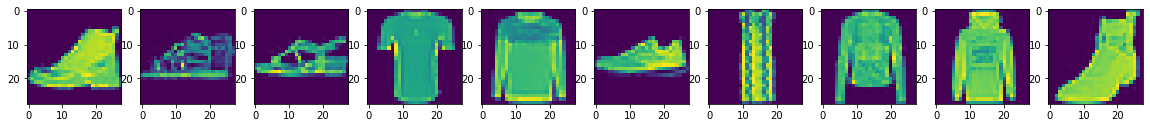

In [5]:
number_of_images = 10
random_numbers = np.random.randint(0, train_images.shape[0], number_of_images)
fig, plots = plt.subplots(1, number_of_images, figsize=(20, 20))
index = 0
for number in random_numbers:
  plots[index].imshow(train_images[number])
  index += 1

## Normalisieren der Daten

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Das Maximum muss jeweils 1 betragen.

In [7]:
print(np.max(train_images))
print(np.max(test_images))

1.0
1.0


## Label in Kategorien umwandeln

In [0]:
total_classes = 10
train_vec_labels = keras.utils.to_categorical(train_labels, total_classes)
test_vec_labels = keras.utils.to_categorical(test_labels, total_classes)

# Das Netz
## Entwurf eines Netzes

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(10, activation='tanh')
])

## Kompilieren des Netzes

In [0]:
model.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['accuracy'])

## Trainieren des Netzes

In [24]:
model.fit(train_images, train_vec_labels, epochs=10, verbose=True)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0686 - acc: 0.6285
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0507 - acc: 0.7470
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0459 - acc: 0.7726
Epoch 4/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0430 - acc: 0.7854
Epoch 5/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0409 - acc: 0.7934
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0394 - acc: 0.8007
Epoch 7/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0381 - acc: 0.8066
Epoch 8/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0370 - acc: 0.8106
Epoch 9/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0361 - acc: 0.8138
Epoch 10/10
60000/60000 [==============================] - 

## Evaluieren des Netzes

In [25]:
eval_loss, eval_accuracy = model.evaluate(test_images, test_vec_labels, verbose=False)
print("Model accuracy: %.2f" % eval_accuracy)
print(eval_loss)

Model accuracy: 0.81
0.03611853447258472
